# **Model Development Demonstration using Polling 2016 Data**

Source: murach's Python for Data Analysis
Author: Scott McCoy

## Part 1

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from urllib import request

### Get The Data

In [2]:
poll_path = 'http://projects.fivethirtyeight.com/general-model/'
filename = 'president_general_polls_2016.csv'
request.urlretrieve(poll_path+filename, filename=filename)
polls = pd.read_csv(filename)

## Part 2

### Display the Data

In [3]:
#polls

In [4]:
polls.head(2)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016


In [5]:
polls.tail(2)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
12622,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Virginia,9/30/2016,10/6/2016,Ipsos,A-,...,49.57558,39.96954,NaN,NaN,NaN,http://www.reuters.com/statesofthenation/,46675,72969,10/10/16,09:14:14 8 Nov 2016
12623,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,6/9/2016,6/12/2016,Marquette University,A,...,46.40999,39.19839,NaN,NaN,NaN,https://law.marquette.edu/poll/2016/06/15/new-...,44341,66966,6/15/16,09:14:14 8 Nov 2016


In [6]:
#with pd.option_context('display.max_rows', 2, 'display.max_columns', None): display(polls)

### Examine the Data

In [7]:
polls.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle             12624 non-null  int64  
 1   branch            12624 non-null  object 
 2   type              12624 non-null  object 
 3   matchup           12624 non-null  object 
 4   forecastdate      12624 non-null  object 
 5   state             12624 non-null  object 
 6   startdate         12624 non-null  object 
 7   enddate           12624 non-null  object 
 8   pollster          12624 non-null  object 
 9   grade             11337 non-null  object 
 10  samplesize        12621 non-null  float64
 11  population        12624 non-null  object 
 12  poll_wt           12624 non-null  float64
 13  rawpoll_clinton   12624 non-null  float64
 14  rawpoll_trump     12624 non-null  float64
 15  rawpoll_johnson   8397 non-null   float64
 16  rawpoll_mcmullin  90 non-null     float6

In [8]:
polls.nunique(dropna=False)

cycle                   1
branch                  1
type                    3
matchup                 1
forecastdate            1
state                  57
startdate             352
enddate               345
pollster              196
grade                  11
samplesize           1767
population              4
poll_wt              4399
rawpoll_clinton      1312
rawpoll_trump        1385
rawpoll_johnson       585
rawpoll_mcmullin       17
adjpoll_clinton     12569
adjpoll_trump       12582
adjpoll_johnson      6630
adjpoll_mcmullin       58
multiversions           2
url                  1305
poll_id              4208
question_id          4208
createddate           222
timestamp               3
dtype: int64

In [9]:
polls.apply(pd.unique)

cycle                                                          [2016]
branch                                                    [President]
type                               [polls-plus, now-cast, polls-only]
matchup                               [Clinton vs. Trump vs. Johnson]
forecastdate                                                [11/8/16]
state               [U.S., New Mexico, Virginia, Iowa, Wisconsin, ...
startdate           [11/3/2016, 11/1/2016, 11/2/2016, 11/4/2016, 1...
enddate             [11/6/2016, 11/7/2016, 11/5/2016, 11/4/2016, 1...
pollster            [ABC News/Washington Post, Google Consumer Sur...
grade                       [A+, B, A-, B-, A, nan, B+, C+, C-, C, D]
samplesize          [2220.0, 26574.0, 2195.0, 3677.0, 16639.0, 129...
population                                             [lv, rv, a, v]
poll_wt             [8.720654, 7.628472, 6.424334, 6.087135, 5.316...
rawpoll_clinton     [47.0, 38.03, 42.0, 45.0, 48.0, 44.0, 46.0, 41...
rawpoll_trump       

## Part 3

### Clean the Data

#### Drop columns and rows

In [10]:
#drop columns with only 1 value
polls.drop(columns=['cycle','branch','matchup','forecastdate'],inplace=True)

In [11]:
#keep only rows with "now-cast" in the type column and drop that column
polls = polls.query('type == "now-cast"')
polls.head(2)

,type,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
4208,now-cast,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,...,45.23046,41.68534,4.649687,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:24:53 8 Nov 2016
4209,now-cast,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,...,43.36603,41.20737,5.175080,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:24:53 8 Nov 2016


In [12]:
polls.drop(columns='type', inplace=True)

In [13]:
#keep only rows with the 'lv' and 'rv'in the population column
polls.query('population != "lv" & population != "rv"') #just 63 rows
polls = polls.query('population in ["lv","rv"]')

In [14]:
#find unnecessary index columns and then drop them
polls.loc[:, polls.nunique() == polls.shape[0]] #display columns 
polls.drop(columns=['poll_id', 'question_id'], inplace=True)

In [15]:
#find columns that start with 'adjpoll' and then drop them
polls.loc[:, polls.columns.str.startswith('adjpoll')]
polls = polls.loc[:, ~polls.columns.str.startswith('adjpoll')]

In [16]:
#drop the columns for Johnson and McMullin
polls.drop(columns=['rawpoll_johnson', 'rawpoll_mcmullin'], inplace=True)

In [17]:
#check the non-null rows in the multiversions column and drop that column
polls.loc[polls.multiversions.notnull()]
polls.drop(columns='multiversions')

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,url,createddate,timestamp
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00,https://www.washingtonpost.com/news/the-fix/wp...,11/7/16,09:24:53 8 Nov 2016
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69,https://datastudio.google.com/u/0/#/org//repor...,11/7/16,09:24:53 8 Nov 2016
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00,http://projects.fivethirtyeight.com/polls/2016...,11/8/16,09:24:53 8 Nov 2016
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00,https://d25d2506sfb94s.cloudfront.net/cumulus_...,11/7/16,09:24:53 8 Nov 2016
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00,http://www.gravispolls.com/2016/11/final-natio...,11/7/16,09:24:53 8 Nov 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,North Carolina,8/26/2016,8/27/2016,Public Policy Polling,B+,1177.0,lv,0.000000,45.00,44.00,http://nelpaction.org/wp-content/uploads/2016/...,9/1/16,09:24:53 8 Nov 2016
8412,North Carolina,3/9/2016,3/10/2016,SurveyUSA,A,1576.0,lv,0.000000,42.00,49.00,http://www.highpoint.edu/blog/2016/03/hpu-poll...,5/5/16,09:24:53 8 Nov 2016
8413,North Carolina,7/31/2016,8/2/2016,SurveyUSA,A,400.0,lv,0.000000,42.00,46.00,https://www.nccivitas.org/2016/civitas-release...,8/3/16,09:24:53 8 Nov 2016
8414,Utah,8/5/2016,8/25/2016,Ipsos,A-,177.0,lv,0.000000,33.67,38.53,http://www.reuters.com/statesofthenation,8/26/16,09:24:53 8 Nov 2016


In [18]:
##drop 3 more columns
polls.drop(columns=['createddate', 'timestamp', 'url'], inplace=True)
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,multiversions
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00,NaN
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69,NaN
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00,NaN
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00,NaN
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00,NaN


In [19]:
#rename voting columns
polls.rename(columns={'rawpoll_clinton':'clinton_pct', 'rawpoll_trump':'trump_pct'}, inplace=True)

In [20]:
#fix object types that should be numeric or datetime objects
##list the object types
polls.select_dtypes('object').head(2)

,state,startdate,enddate,pollster,grade,population,multiversions
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,lv,NaN
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,lv,NaN


In [21]:
##convert the object types that are dates to datetime objects
date_cols = ['startdate','enddate']
polls[date_cols] = polls[date_cols].apply(pd.to_datetime)

In [22]:
#fix the data for the state column
##list the unique values in the state column
polls.state.unique() #this lists values like "maine CD-1" and "Maine CD-2"

array(['U.S.', 'New Mexico', 'Virginia', 'Iowa', 'Wisconsin',
       'North Carolina', 'Georgia', 'Florida', 'Oregon', 'Ohio',
       'South Carolina', 'New York', 'Michigan', 'Pennsylvania',
       'Missouri', 'New Hampshire', 'Arizona', 'Nevada', 'Colorado',
       'California', 'Washington', 'Texas', 'Utah', 'Illinois', 'Indiana',
       'Tennessee', 'Connecticut', 'Massachusetts', 'New Jersey',
       'Kansas', 'Kentucky', 'Minnesota', 'Oklahoma', 'Maryland',
       'Alabama', 'Nebraska', 'Louisiana', 'Maine', 'Arkansas', 'Alaska',
       'Vermont', 'Idaho', 'Mississippi', 'West Virginia', 'South Dakota',
       'Montana', 'Hawaii', 'Maine CD-1', 'Maine CD-2', 'Rhode Island',
       'Nebraska CD-1', 'Nebraska CD-3', 'Delaware', 'North Dakota',
       'District of Columbia', 'Nebraska CD-2', 'Wyoming'], dtype=object)

In [23]:
##list all state values that contain "CD-"
polls[polls.state.str.contains('CD-')]['state']

4486       Maine CD-1
4487       Maine CD-2
4491    Nebraska CD-1
4492    Nebraska CD-3
4496       Maine CD-2
4534       Maine CD-2
4543       Maine CD-1
4545       Maine CD-1
4552    Nebraska CD-2
4571       Maine CD-2
4640    Nebraska CD-2
4790       Maine CD-2
4872       Maine CD-1
4878       Maine CD-2
4963       Maine CD-2
4970       Maine CD-1
5095       Maine CD-2
5115       Maine CD-2
5123       Maine CD-1
5124       Maine CD-1
5125       Maine CD-2
5172       Maine CD-2
5173       Maine CD-1
5497       Maine CD-2
5519       Maine CD-1
6146       Maine CD-2
6172       Maine CD-1
6467       Maine CD-1
6517       Maine CD-2
Name: state, dtype: object

In [24]:
##drop those rows after you find out that CD stands for Congressional District
polls = polls.loc[~polls.state.str.contains('CD-')]

<AxesSubplot:xlabel='enddate'>

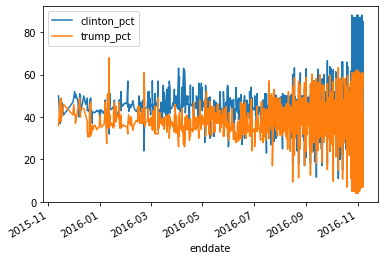

In [25]:
#take an early plot with Pandas
polls.plot.line(x='enddate', y=['clinton_pct','trump_pct'])

### Save the DataFrame as a pickle file

In [26]:
polls.to_pickle('polls_clean.pkl')

## Part 4

### Prepare the Data

#### Add Columns for Grouping and Filtering

In [27]:
#add a voter_type column and drop the population column
polls['voter_type'] = polls.population.replace({'lv':'likely','rv':'registered'})

In [28]:
polls.drop(columns='population', inplace=True)

In [29]:
#add a gap column for the gap between the Clinton and Trump percents
polls['gap'] = polls.clinton_pct - polls.trump_pct

In [30]:
#add a state_gap summary column that contains the gap for each state
polls['state_gap'] = polls.groupby('state').gap.transform(func='mean')

In [31]:
#add a swing column that identifies states with a less than a 7 percent gap
polls['swing'] = (polls.state != "U.S.") & (abs(polls.state_gap) < 7)

In [32]:
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,poll_wt,clinton_pct,trump_pct,multiversions,voter_type,gap,state_gap,swing
4208,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,8.720654,47.00,43.00,NaN,likely,4.00,4.347514,False
4209,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,7.628472,38.03,35.69,NaN,likely,2.34,4.347514,False
4210,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,6.424334,42.00,39.00,NaN,likely,3.00,4.347514,False
4211,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,6.087135,45.00,41.00,NaN,likely,4.00,4.347514,False
4212,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,5.316449,47.00,43.00,NaN,registered,4.00,4.347514,False


In [33]:
#display rows for swing states
##with the query() method
polls.query('swing == True').head(2)

,state,startdate,enddate,pollster,grade,samplesize,poll_wt,clinton_pct,trump_pct,multiversions,voter_type,gap,state_gap,swing
4223,Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,800.0,3.842234,39.0,46.0,NaN,likely,-7.0,-0.809538,True
4225,Wisconsin,2016-10-26,2016-10-31,Marquette University,A,1255.0,3.789957,46.0,40.0,NaN,likely,6.0,6.929367,True


In [34]:
##with the loc accessor
polls.loc[polls.swing == True].head(2)

,state,startdate,enddate,pollster,grade,samplesize,poll_wt,clinton_pct,trump_pct,multiversions,voter_type,gap,state_gap,swing
4223,Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,800.0,3.842234,39.0,46.0,NaN,likely,-7.0,-0.809538,True
4225,Wisconsin,2016-10-26,2016-10-31,Marquette University,A,1255.0,3.789957,46.0,40.0,NaN,likely,6.0,6.929367,True


#### Create a new DataFrame in long form

In [35]:
#melt the data to add two columns
polls_long = polls.melt(
id_vars=['state','enddate','voter_type','state_gap','swing'],
value_vars=['clinton_pct', 'trump_pct'],
var_name='candidate',
value_name='percent')

In [36]:
#clean up the strings in the candidate column
polls_long['candidate'] = polls_long.candidate.str.replace('_pct','').str.title()

<AxesSubplot:xlabel='enddate', ylabel='percent'>

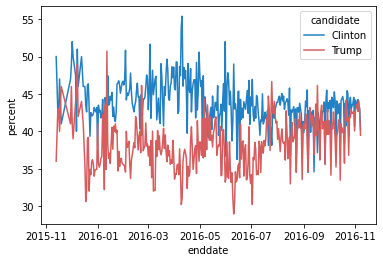

In [37]:
#take an early plot of the long data with Seaborn
colors = ['#2281c4','#d75c5d'] #blue and red
sns.set_palette(sns.color_palette(colors)) #change color palette
sns.lineplot(data=polls_long, x='enddate', y='percent', hue='candidate', ci=None)

In [38]:
#add monthly bins to the DataFrame
import datetime as dt
dates = pd.date_range('10/01/2015', '12/01/2016', freq='M')
bin_labels = [dt.datetime.strftime(x, '%b %Y') for x in dates[1:]]
monthly_bins = pd.cut(x=polls_long.enddate, bins=dates, labels=bin_labels)
polls_long['month_bin'] = monthly_bins
polls_long.head()

,state,enddate,voter_type,state_gap,swing,candidate,percent,month_bin
0,U.S.,2016-11-06,likely,4.347514,False,Clinton,47.00,Nov 2016
1,U.S.,2016-11-07,likely,4.347514,False,Clinton,38.03,Nov 2016
2,U.S.,2016-11-06,likely,4.347514,False,Clinton,42.00,Nov 2016
3,U.S.,2016-11-07,likely,4.347514,False,Clinton,45.00,Nov 2016
4,U.S.,2016-11-06,registered,4.347514,False,Clinton,47.00,Nov 2016


In [39]:
#add an average percent column for each month
polls_long['month_pct_avg'] = polls_long.groupby(
['candidate','state','month_bin']).percent.transform(func='mean')
polls_long.head()

,state,enddate,voter_type,state_gap,swing,candidate,percent,month_bin,month_pct_avg
0,U.S.,2016-11-06,likely,4.347514,False,Clinton,47.00,Nov 2016,45.067903
1,U.S.,2016-11-07,likely,4.347514,False,Clinton,38.03,Nov 2016,45.067903
2,U.S.,2016-11-06,likely,4.347514,False,Clinton,42.00,Nov 2016,45.067903
3,U.S.,2016-11-07,likely,4.347514,False,Clinton,45.00,Nov 2016,45.067903
4,U.S.,2016-11-06,registered,4.347514,False,Clinton,47.00,Nov 2016,45.067903


In [40]:
#save the wide and long DataFrames as pickle files
polls.to_pickle('polls_prepared.pkl')
polls_long.to_pickle('pickle_long.pkl')

## Part 5

### Analyze the Data

#### Plot the national and seing state polls

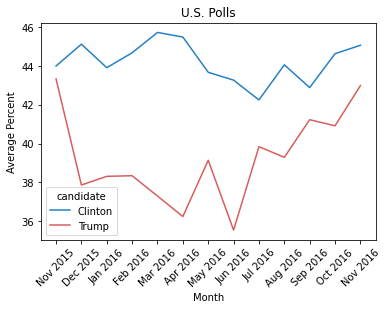

In [41]:
#the national polls
ax = sns.lineplot(data=polls_long.query('state == "U.S."'),
                 x='month_bin', y='month_pct_avg', hue='candidate', ci=None)
ax.set(title='U.S. Polls', xlabel='Month', ylabel='Average Percent')
ax.tick_params('x', labelrotation=45)

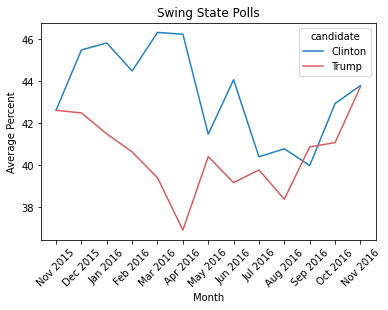

In [42]:
#the swing state polls
ax = sns.lineplot(data=polls_long.query('swing == True'),
                 x='month_bin', y='month_pct_avg', hue='candidate', ci=None)
ax.set(title='Swing State Polls', xlabel='Month', ylabel='Average Percent')
ax.tick_params('x', labelrotation=45)

### Plot the Voter Types

#### Plot the swing state results by voter type

In [43]:
#group the data by voter_type and candidate
polls_grouped = polls_long.query('swing == True').groupby(['voter_type', 'candidate'])

In [44]:
#look at the mean and standard deviation of the percent column
polls_grouped.percent.agg(['mean','std']).unstack(level='candidate').head()

mean                  std          
candidate     Clinton      Trump   Clinton     Trump
voter_type                                          
likely      42.339206  41.223044  4.672971  5.497081
registered  42.771795  40.431624  4.433704  4.564361

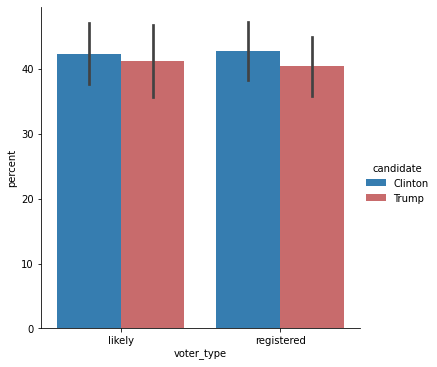

In [45]:
#plot the mean and standard deviation of the percent column for each candidate
sns.catplot(data=polls_long.query('swing == True'), kind='bar', x='voter_type', y='percent', hue='candidate', ci='sd')

#### Plot the last two months of polling

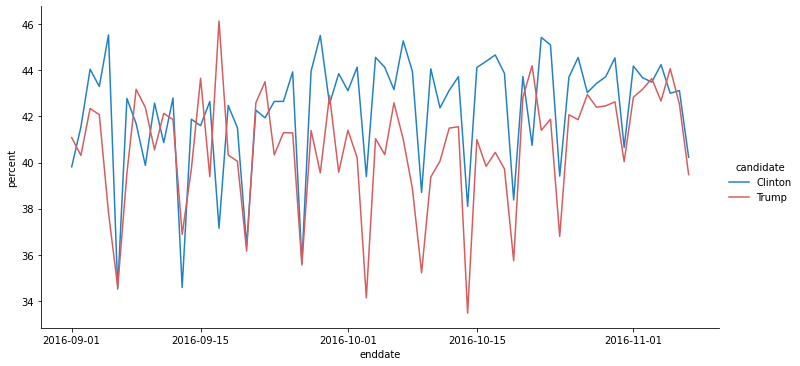

In [46]:
#plot the last two months of polling for likely voters in all swing states
g = sns.relplot(data=polls_long.query('voter_type == likely' and 'swing == True' and 'enddate >= "2016-09"'),
kind='line', x='enddate', y='percent', hue='candidate', ci=None, aspect=2)

#### Plot the gap changes in selected states

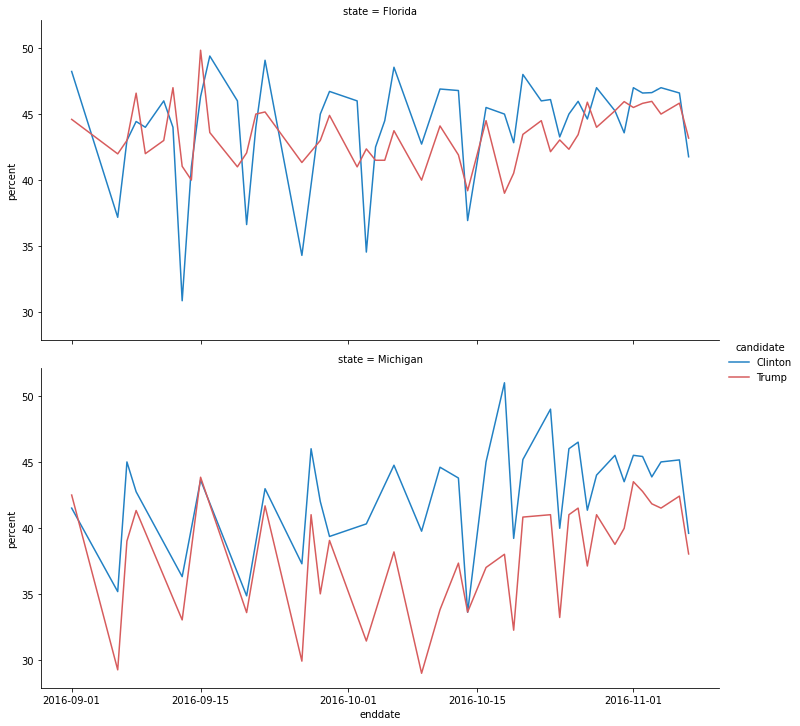

In [47]:
#plot the last two months of polling for likely voters in selected states
sns.relplot(data=polls_long.query('state in ["Michigan", "Florida"] and voter_type == "likely" and enddate >= "2016-09"'),
kind='line', x='enddate', y='percent', hue='candidate', ci=None, col='state', col_wrap=1, aspect=2)

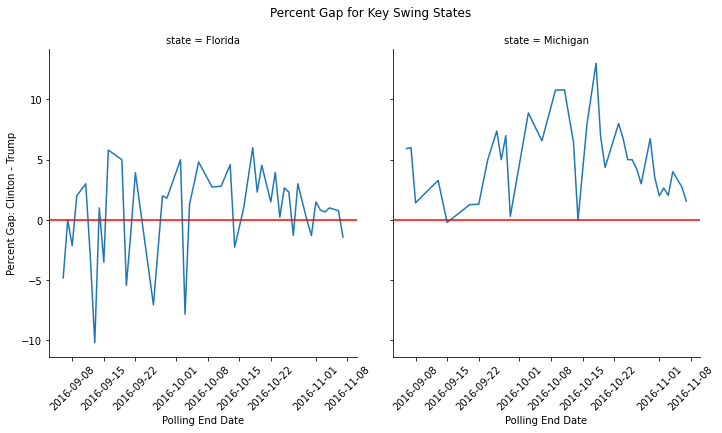

In [48]:

##restore the default color palette
sns.set_palette(sns.color_palette('tab10'))

#create plot
g = sns.relplot(data=polls.query('state==["Michigan", "Florida"] and enddate > "2016-09"'),
              kind="line", x='enddate', y='gap', ci=None, col='state', col_wrap=2)

#format the plot 
g.fig.suptitle('Percent Gap for Key Swing States', y=1.05)
g.set(xlabel="Polling End Date", ylabel="Percent Gap: Clinton - Trump")
for ax in g.axes.flat:
    ax.tick_params('x', labelrotation=45)
    ax.axhline(0, color='red')

#### Prepare the gap data for the last week of polling

In [49]:
polls_gap = polls.query('state==["Wisconsin","Arizona","Pennsylvania","Nevada","Iowa","Florida","North Carolina","Ohio"] & enddate > "2016-11-01"')[['state','gap']]
polls_gap = polls_gap.groupby('state').mean()
polls_gap

,gap
state,
Arizona,-1.376923
Florida,0.573500
Iowa,-4.243846
Nevada,0.413529
North Carolina,2.471176
Ohio,-1.652632
Pennsylvania,2.608571
Wisconsin,4.712308


In [50]:
polls_gap['advantage'] = polls_gap.apply(
lambda row: 'Clifton' if row.gap> 0 else 'Trump', axis=1)
polls_gap['gap'] = abs(polls_gap.gap)
polls_gap = polls_gap.reset_index()
polls_gap

,state,gap,advantage
0,Arizona,1.376923,Trump
1,Florida,0.573500,Clifton
2,Iowa,4.243846,Trump
3,Nevada,0.413529,Clifton
4,North Carolina,2.471176,Clifton
5,Ohio,1.652632,Trump
6,Pennsylvania,2.608571,Clifton
7,Wisconsin,4.712308,Clifton


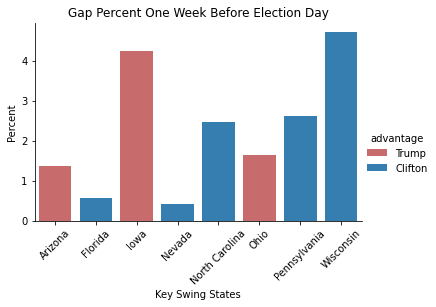

In [51]:
#set custom color palette
colors = ['#d75c5d', '#2281c4'] #red and blue
sns.set_palette(sns.color_palette(colors))

#create the plot
g = sns.catplot(data=polls_gap, x='state', y='gap', kind='bar', hue='advantage', dodge=False)

#format the plot
for ax in g.axes.flat:
    ax.tick_params('x', labelrotation=45)
    ax.set(title='Gap Percent One Week Before Election Day', 
          xlabel='Key Swing States',
          ylabel='Percent')

#save the plot
g.fig.subplots_adjust(top=0.90) #adjust the top to fit the title
g.fig.subplots_adjust(bottom=0.35) #adjust the bottom to fix the y labels
g.fig.savefig('swing_state_gap_bar.png')

#### Prepare the weekly gap data for the swing states

In [52]:
#get the columns and rows for this plot
polls_heat = polls[['state','enddate','samplesize','clinton_pct','trump_pct','swing']].copy()
polls_heat = polls_heat.query('swing == True')

#add two colums
polls_heat['clinton_count'] = polls_heat.samplesize * polls_heat.clinton_pct
polls_heat['trump_count'] = polls_heat.samplesize * polls_heat.trump_pct

#select only the necessary columns
polls_heat = polls_heat[['state','clinton_count','trump_count','enddate']]

#create and add the weekly bins
dates = pd.date_range('09/01/2016', '11/13/2016', freq='w')
bin_labels = [dt.datetime.strftime(x, '%d %b') for x in dates[1:]]
weekly_bins = pd.cut(x=polls_heat.enddate, bins=dates, labels=bin_labels)
polls_heat['weekly_bin'] = weekly_bins
polls_heat.head(3)

,state,clinton_count,trump_count,enddate,weekly_bin
4223,Iowa,31200.0,36800.0,2016-11-04,06 Nov
4225,Wisconsin,57730.0,50200.0,2016-10-31,06 Nov
4226,North Carolina,35200.0,35200.0,2016-11-06,06 Nov


#### Calculate weekly gap data

In [55]:
#group and sum the weekly counts by state
polls_heat = polls_heat.groupby(['state','weekly_bin']).sum().fillna(0)

#add the gap column and remove all other columns
polls_heat['gap'] = ((polls_heat.clinton_count - polls_heat.trump_count)/(polls_heat.clinton_count + polls_heat.trump_count)) * 100
polls_heat = polls_heat[['gap']].fillna(0).round(1)

#unstack the weekly bin level and drop level 0 (gap)
polls_heat = polls_heat.unstack(level='weekly_bin')
polls_heat = polls_heat.droplevel(level=0, axis=1)
polls_heat.head(3)

weekly_bin,11 Sep,18 Sep,25 Sep,02 Oct,09 Oct,16 Oct,23 Oct,30 Oct,06 Nov,13 Nov
state,,,,,,,,,,
Arizona,-3.0,-4.7,-0.6,0.8,0.9,0.6,5.1,-0.3,-1.4,4.0
Colorado,5.7,2.1,1.3,7.8,6.4,9.5,7.3,7.0,4.5,7.0
Florida,-1.9,-4.3,-3.0,0.5,0.8,2.3,3.5,1.9,0.9,0.3


#### Calculate weekly gap data

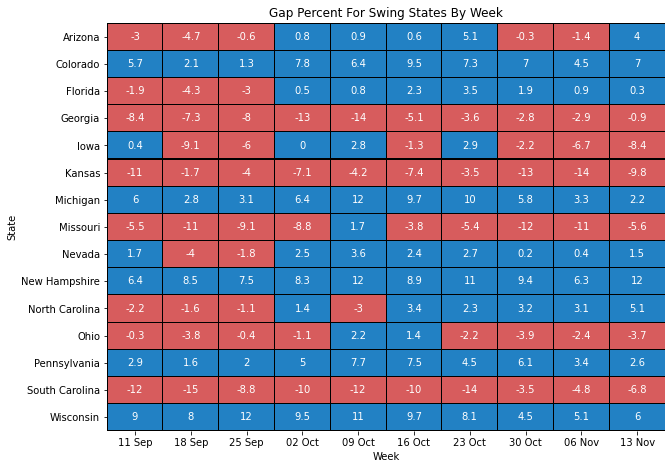

In [57]:
#use matplotlib to set the figure size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7.5))

#create the plot
sns.heatmap(polls_heat, cmap=['#d75c5d','#2281c4'], center=0, annot=True, linewidths=0.01, linecolor='black', cbar=False)

#format the plot
ax.set(title='Gap Percent For Swing States By Week', xlabel='Week', ylabel='State')

#save the figure
fig.savefig('swing_state_gap_heat_map.png')